In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def hodgkin_and_huxley_model(Ie_A,dt,time_i):
    # H&H model of neuron
    # given parameters
    cm = 0.01 # microA/mm^2
    Vin = -65 #mV

    #conductances
    gl = 0.003 #nS/mm^2
    gk = 0.36 #nS/mm^2
    gna = 1.2 #nS/mm^2

    # potentials
    El = -54.367 #mV
    Ek = -77 #mV
    Ena = 50 #mV

    # initialize
    V = np.zeros(len(time_i))
    n = np.zeros(len(time_i))
    m = np.zeros(len(time_i))
    h = np.zeros(len(time_i))

    V[0] = Vin
    m[0] = 0.0529
    h[0] = 0.5961
    n[0] = 0.3177

    # define functions for alpha and beta
    def alpha_n(V): return (0.01*(V+55))/(1-np.exp(-0.1*(V+55)))
    def alpha_m(V): return (0.1*(V+40))/(1-np.exp(-0.1*(V+40)))
    def alpha_h(V): return 0.07*np.exp(-0.05*(V+65))
    def beta_n(V): return 0.125*np.exp(-0.0125*(V+65))
    def beta_m(V): return 4*np.exp(-0.0556*(V+65))
    def beta_h(V): return 1/(1+np.exp(-0.1*(V+35)))

    # Euler method of integration
    for tt in range(1,len(time_i)): 

        # get im
        Il = gl * (V[tt-1]-El)
        Ik = gk * (n[tt-1]**4) * (V[tt-1]-Ek)
        Ina = gna * (m[tt-1]**3) * h[tt-1] * (V[tt-1]-Ena) 
        im = Il + Ik + Ina

        # get V using Euler method
        V[tt] = V[tt-1] + dt*((-im+Ie_A[tt-1]))/cm
        
        # update gating
        alpn = alpha_n(V[tt-1])
        alpm = alpha_m(V[tt-1])
        alph = alpha_h(V[tt-1])
        betn = beta_n(V[tt-1])
        betm = beta_m(V[tt-1])
        beth = beta_h(V[tt-1])

        # using Euler method
        n[tt] = n[tt-1] + dt*(alpn*(1-n[tt-1]) - betn*n[tt-1])
        m[tt] = m[tt-1] + dt*(alpm*(1-m[tt-1]) - betm*m[tt-1])
        h[tt] = h[tt-1] + dt*(alph*(1-h[tt-1]) - beth*h[tt-1])


    return V, h, n, m



Text(0, 0.5, 'h')

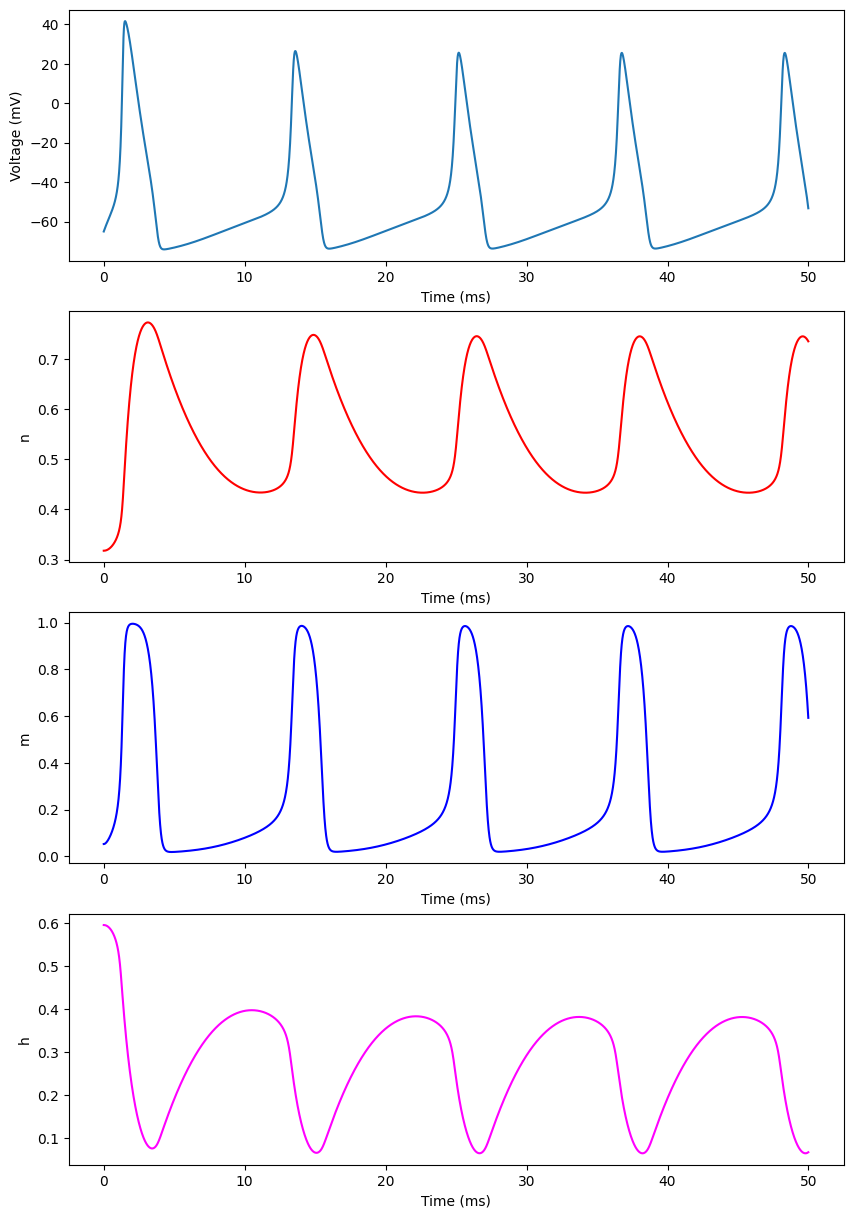

In [2]:
# Exercise a)
# set time of simulation
dt = 0.01 #ms
T = 50 #ms, simulation time
time_i = np.arange(0,T,dt)

# injected current
Ie_A = np.ones(len(time_i))*0.2 #micro/mm^2

# run H&H
V, h, n, m = hodgkin_and_huxley_model(Ie_A,dt,time_i)

# display V, n, m, h
fig, axs = plt.subplots(4)

fig.set_figheight(15)
fig.set_figwidth(10)

axs[0].plot(time_i,V)
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Voltage (mV)')

axs[1].plot(time_i,n, color='red')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('n')

axs[2].plot(time_i,m, color='blue')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('m')

axs[3].plot(time_i,h, color='magenta')
axs[3].set_xlabel('Time (ms)')
axs[3].set_ylabel('h')

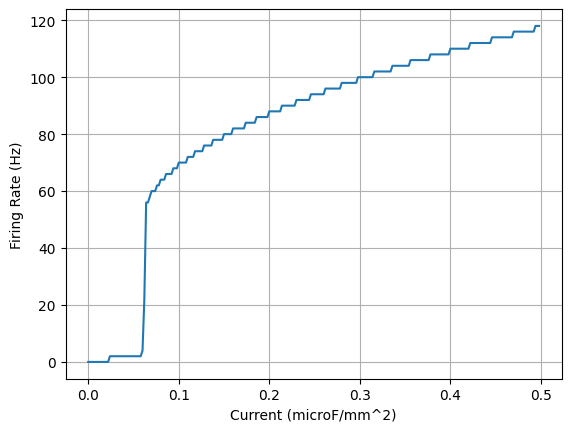

In [ ]:
# Exercise b)
I = np.arange(0,500,2)

dt = 0.01 #ms
T = 500 #ms, simulation time
time_i = np.arange(0,T,dt)

fr = []

# injected current
for idx in range(len(I)):
    
    Ie_A = np.ones(len(time_i))*(10**-3)*I[idx] #microA/mm^2
    # run H&H
    V, h, n, m = hodgkin_and_huxley_model(Ie_A,dt,time_i)
    # compute firing rate
    spike_times, properties = find_peaks(V, height=0)
    fr.append(len(spike_times)/(T/1000))

    #plt.figure()
    #plt.plot(V)
    #for ii in spike_times:
    #    plt.axvline(ii, color ='red')

plt.figure()
plt.plot(I*(10**-3), fr)
plt.xlabel('Current (microA/mm^2)')
plt.ylabel('Firing Rate (Hz)')
plt.grid()


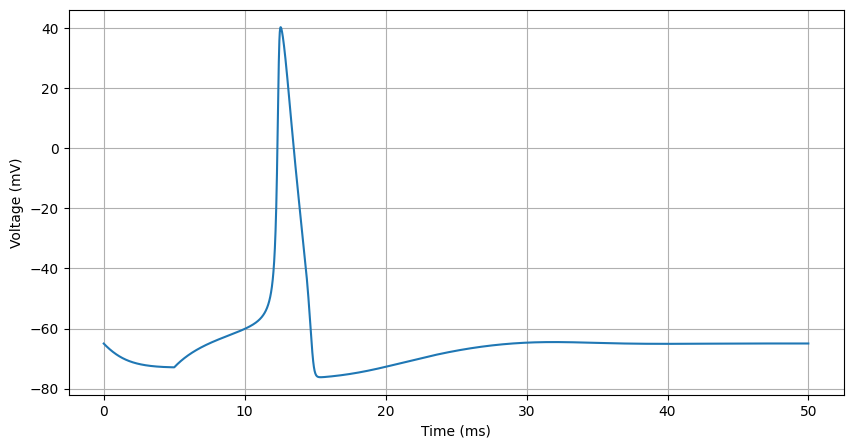

In [5]:
# Exercise c)
dt = 0.01 #ms
T = 50 #ms, simulation time
T_imp = 5 #ms - time of stimulation
time_i = np.arange(0,T,dt)

# injected current
Ie_A = np.ones(int(T_imp/dt))*-0.05 #micro/mm^2
Ie_A = np.append(Ie_A, np.zeros(int((T-T_imp)/dt)))

# run H&H
V, h, n, m = hodgkin_and_huxley_model(Ie_A,dt,time_i)

# display V, n, m, h
plt.figure(figsize=(10,5))
plt.plot(time_i,V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.grid()

